In [1]:
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mnist_dataset = fetch_openml('mnist_784')

In [3]:
X, y = mnist_dataset["data"], mnist_dataset["target"]
print(X)
print("---------------------------------------------------------------------------------")
print(y)


       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [4]:
X, y = X.to_numpy(), y.to_numpy()
print(X)
print(y)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


In [5]:
mask = (y == "0") | (y == "1")
X = X[mask]
y = y[mask].astype(int)
print(y)


[0 1 1 ... 1 0 1]


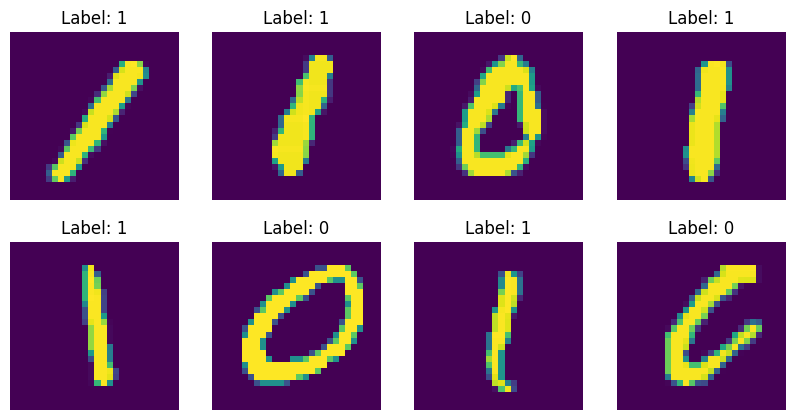

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
ax = ax.flatten()

for axis in ax:
  idx = np.random.randint(0, X.shape[0])
  image = X[idx]
  image = image.reshape(28, 28)
  axis.imshow(image)
  axis.axis("off")
  axis.set_title(f'Label: {y[idx]}')
plt.show()

In [ ]:
class Perceptron(BaseEstimator):
    def __init__(self, eta=0.05, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
      
    def get_params(self, deep=True):
        return {
            "eta": self.eta,
            "n_iter": self.n_iter,
            "random_state": self.random_state,
        }

    def set_params(self, **params):
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        rgen = np.random.default_rng(self.random_state)
        self.w_ = rgen.normal(
            loc=0.0,
            scale=0.01,
            size=X.shape[1],
        )
        self.b_ = np.float64(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [ ]:
per_clf = Perceptron(eta=0.0001, n_iter=100, random_state=42)

print(
    cross_val_score(
        per_clf,
        X,
        y,
        cv=3,
        scoring=make_scorer(accuracy_score),
    )
)


[0.99898518 0.99797037 0.99898498]
